In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['number_of_reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['number_of_reviews'].max()
Min = Amsterdam['number_of_reviews'].min()
Limites = [Min, Max]
Limites

[0.0, 75.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

75.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

5.2705645020273

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 75, 15)
intervalos

array([ 0.        ,  5.35714286, 10.71428571, 16.07142857, 21.42857143,
       26.78571429, 32.14285714, 37.5       , 42.85714286, 48.21428571,
       53.57142857, 58.92857143, 64.28571429, 69.64285714, 75.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['number_of_reviews'] = pd.cut ( x = Amsterdam ['number_of_reviews'], bins = intervalos, labels = categorias )
Amsterdam['number_of_reviews']

0       Categoria9
1              NaN
2       Categoria3
3       Categoria1
4       Categoria3
           ...    
9654           NaN
9655           NaN
9656    Categoria2
9657           NaN
9658           NaN
Name: number_of_reviews, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['number_of_reviews'])
table1

,number_of_reviews,frequency,percentage,cumulative_perc
0,Categoria1,2507,0.259551,0.290431
1,Categoria3,2342,0.242468,0.561747
2,Categoria2,1529,0.158298,0.738879
3,Categoria4,506,0.052386,0.797498
4,Categoria5,379,0.039238,0.841404
5,Categoria6,318,0.032923,0.878244
6,Categoria7,195,0.020188,0.900834
7,Categoria8,195,0.020188,0.923424
8,Categoria9,189,0.019567,0.945320
9,Categoria10,128,0.013252,0.960148


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,number_of_reviews,frequency
0,Categoria1,2507
1,Categoria3,2342
2,Categoria2,1529
3,Categoria4,506
4,Categoria5,379
5,Categoria6,318
6,Categoria7,195
7,Categoria8,195
8,Categoria9,189
9,Categoria10,128


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('number_of_reviews')
Filtro_index

,frequency
number_of_reviews,
Categoria1,2507
Categoria3,2342
Categoria2,1529
Categoria4,506
Categoria5,379
Categoria6,318
Categoria7,195
Categoria8,195
Categoria9,189


Text(0, 0.5, 'Frecuencia')

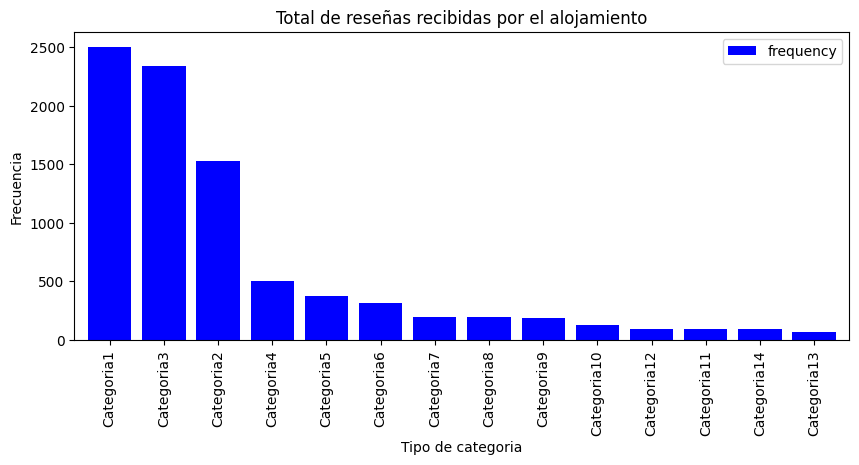

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Total de reseñas recibidas por el alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')